# PROJECT NAME: <br>Exploratory Data Analysis on Indian Tourism

# Introduction:
India being one of the oldest civilisations in the world, is famous for rich heritage and myriad attractions. As the 7th largest country in the world, India stands apart from the rest of Asia, marked off as it is by mountains and the sea, which give the country a distinct geographical entity and one of the most popular tourist destinations in the world.

# Objective:
Purpose of this project is to visualize Tourism in India as a major tool to bring socio-economic development to the people of the country. This project highlights on following facts which are interrelated to Indian Tourism:<br>
* Visualization & Statistical Analysis of Foreign Tourist Arrival (FTA) in India over 2009-2019
* Visualization & Statistical Analysis of Foreign Exchange Income of India over 2009-2019
* Visualization & Statistical Analysis of GDP of India wrt Indian Tourism
* Visualization & Statistical Analysis of Employment Generation in India wrt Indian Tourism

# Data Source:
https://tourism.gov.in/ <br>
https://tourism.gov.in/sites/default/files/2022-09/India%20Tourism%20Statistics%202021%20%281%29.pdf

# Data Description:
From the above data source, we have jotted down the following data into a spreadsheet named "Stats_Tourism.xlsx". 
* Tab1: **"YoY Growth Of FTA"** contains Year & Foreign Tourist Arrival (FTA) Values <br>
* Tab2: **"Region wise FTA"** contains Year, Continents & Region wise FTA Values <br>
* Tab3: **"Forex Income"** contains Year & Forex Income Values <br>
* Tab4: **"GDP"** contains % contribution of tourism on GDP of India over years <br>
* Tab5: **"Employment_Generation"** contains Total Employment & Contribution of Tourism towards Employment

# Importing Necessary Libaries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

# Univariate Analysis:

## i. Foreign Tourist Arrival (FTA):

In [2]:
FTA_1 = pd.read_excel('Stats_Tourism.xlsx', sheet_name=0, index_col='Year')
FTA_1

,FTA's In India(Million)
Year,
2009,5.17
2010,5.78
2011,6.31
2012,6.58
2013,6.97
2014,7.68
2015,8.03
2016,8.80
2017,10.04


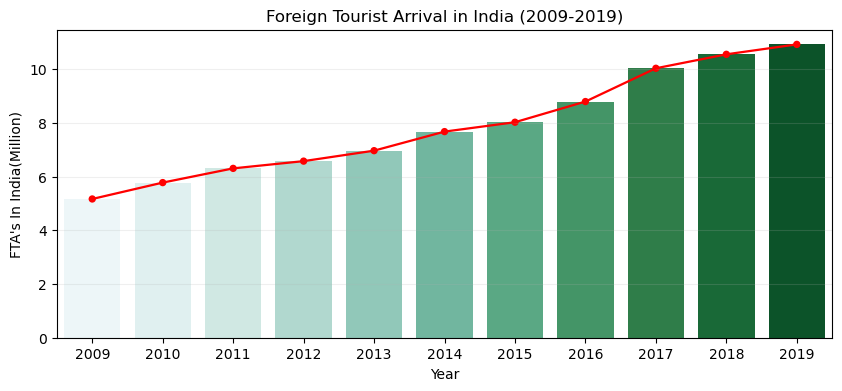

In [3]:
FTA = pd.read_excel('Stats_Tourism.xlsx', sheet_name=0)
plt.figure(figsize=(10,4))
sns.barplot(data=FTA, x = 'Year', y = "FTA's In India(Million)", palette='BuGn')
sns.pointplot(data=FTA, x = 'Year', y = "FTA's In India(Million)", color = 'red', scale=0.6)
plt.title('Foreign Tourist Arrival in India (2009-2019)')
plt.grid(axis='y', ls='-', alpha=0.2)
plt.savefig('fig1');

**<u>Interpretation:</u>** <br> 
* From above graph, we can see number of foreign tourist arriving in India is increasing gradually over the years (2009-2019). 

In [4]:
# Statistical Properties:
FTA["FTA's In India(Million)"].describe()

count    11.000000
mean      7.895455
std       1.969616
min       5.170000
25%       6.445000
50%       7.680000
75%       9.420000
max      10.930000
Name: FTA's In India(Million), dtype: float64

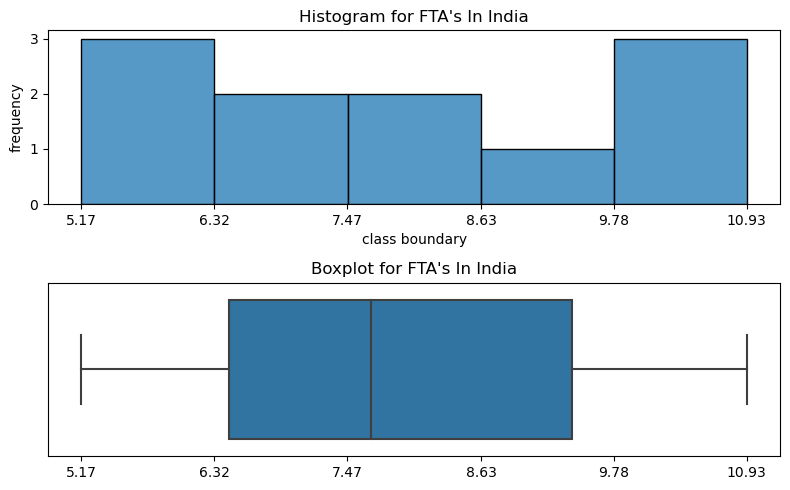

In [5]:
plt.figure(figsize=(8,5))
ax1 = ax2 = 0
FTA_xaxis = np.round(np.histogram(a = FTA["FTA's In India(Million)"], bins=5)[1], 2)

ax1 = plt.subplot(2,1,1)
sns.histplot(data=FTA, x="FTA's In India(Million)", ax=ax1)
ax1.set_xticks(FTA_xaxis)
ax1.set_xlabel('class boundary')
ax1.set_ylabel('frequency')
ax1.set_title("Histogram for FTA's In India")

ax2 = plt.subplot(2,1,2)
sns.boxplot(FTA, x="FTA's In India(Million)", ax=ax2)
ax2.set_title("Boxplot for FTA's In India")
ax2.set_xticks(FTA_xaxis)
ax2.set(yticks=[])
ax2.set_xlabel('')
plt.tight_layout()
plt.savefig('fig2');

**<u>Interpretation:</u>** <br>
* For the given data for the span 2009 to 2019 the median value of number of tourist is  7.68 million.
* There is no outlier value for the given data
* According to Box plot 25% of number of tourists between 2009 to 2019  is less than 6.44M 
* 50% of number of tourist is less than 7.68M 
* 75% of number of tourist is less than 9.42M
* Middle 50% of data is lying in between 6.44M and 9.42M. IQR is (9.42-6.44) = 2.98M
* Since Q2Q3 is greater than Q1Q2; above data is a right skewed / positively skewed.

## ii. Continent wise Tourism Distribution:

In [6]:
cont_df1 = pd.read_excel('Stats_Tourism.xlsx', sheet_name=1, index_col='Year')
cont_df1

,Continent,Region wise FTA
Year,,
2017,Asia,4887295
2017,Africa,318023
2017,North America,1712358
2017,South America,92067
2017,Europe,2609545
2017,Australia,386059
2017,Not Classified,23456
2018,Asia,5165626
2018,Africa,351198


In [7]:
# Statistical Properties:
cont_df = pd.read_excel('Stats_Tourism.xlsx', sheet_name=1)
cont_df['Region wise FTA'].describe()

count    2.100000e+01
mean     1.500816e+06
std      1.808454e+06
min      1.003700e+04
25%      1.010850e+05
50%      4.126280e+05
75%      2.609545e+06
max      5.520527e+06
Name: Region wise FTA, dtype: float64

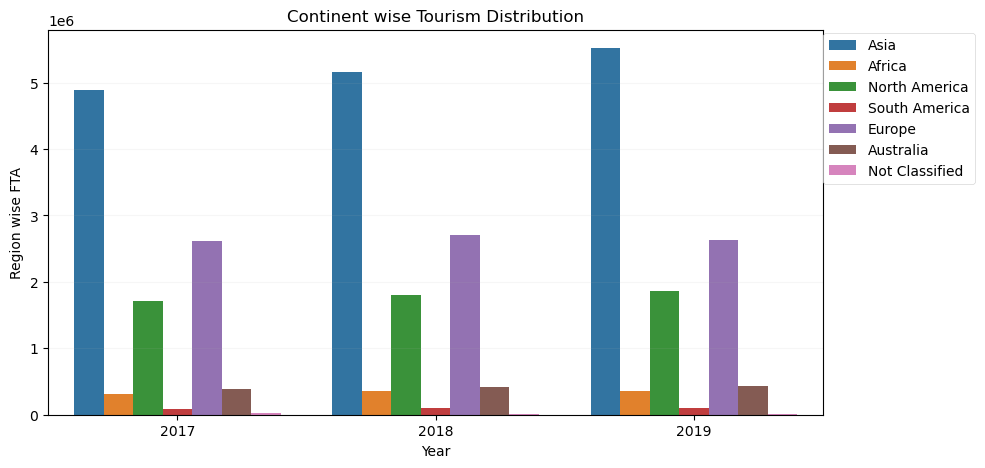

In [8]:
plt.figure(figsize=(10,5))
sns.set_context(rc = {'patch.linewidth': 0.5})
sns.barplot(data=cont_df, x = 'Year', y = 'Region wise FTA', hue = 'Continent')
plt.grid(axis = 'y', alpha = 0.1)
plt.legend(loc=(1,0.6))
plt.title('Continent wise Tourism Distribution')
plt.savefig('fig3');

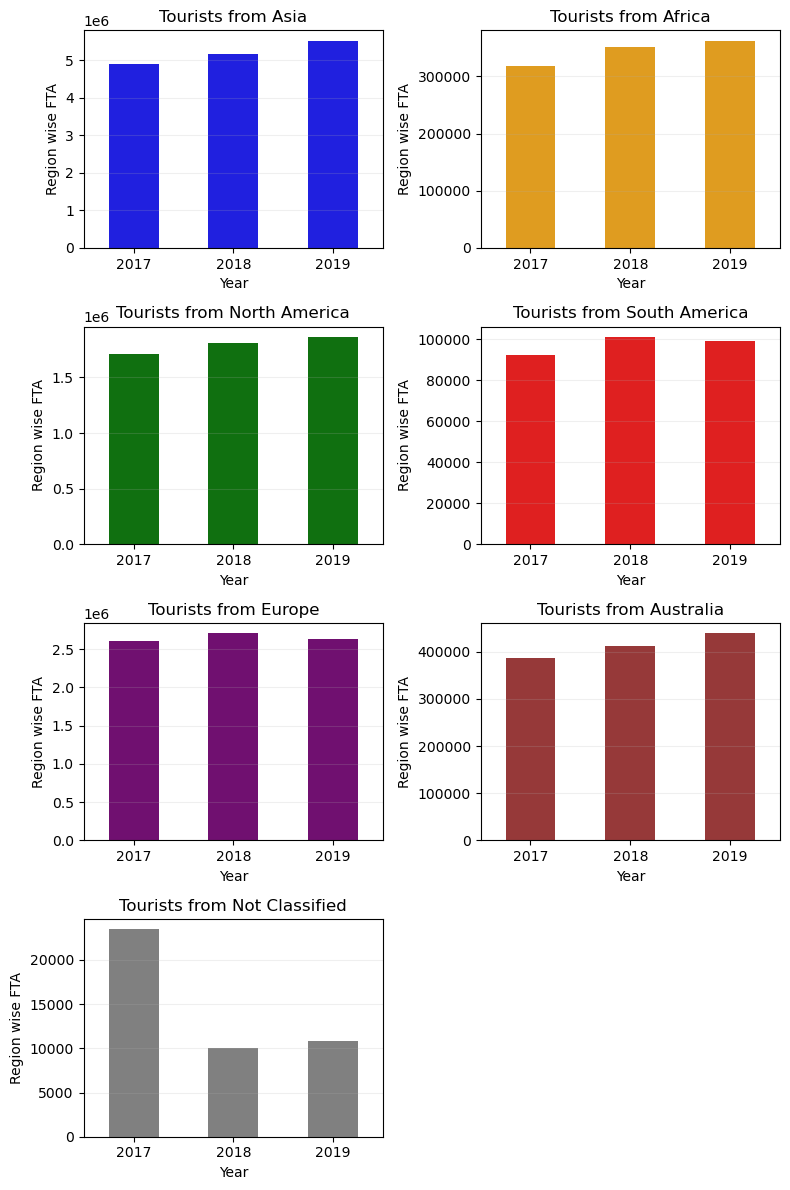

In [9]:
continents = ['Asia', 'Africa', 'North America', 'South America', 'Europe', 'Australia', 
              'Not Classified']
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'grey']
plt.figure(figsize=(8,12))
for i in range(len(continents)):
    axi = plt.subplot(4,2,i+1)
    sns.barplot(data = cont_df[cont_df['Continent'] == continents[i]], x='Year', y='Region wise FTA', 
                ax=axi, width=0.5, color = colors[i])
    plt.grid(axis='y', alpha = 0.2)
    axi.set_title('Tourists from {}' .format(continents[i]))
    plt.tight_layout();

**<u>Interpretation:</u>** <br>
* Over the years from 2017 to 2019; in Europe and South America, Number of tourist slighly decreases in 2019 as compared to 2018.

* <u> Possible reasons can be : </u><br>
(**a**) lack of overseas promotion by the government, <br>
(**b**) outdated brand image, <br>
(**c**) no heads for India Tourism offices overseas, <br>
(**d**) poor PR efforts to counter negative publicity.<br>

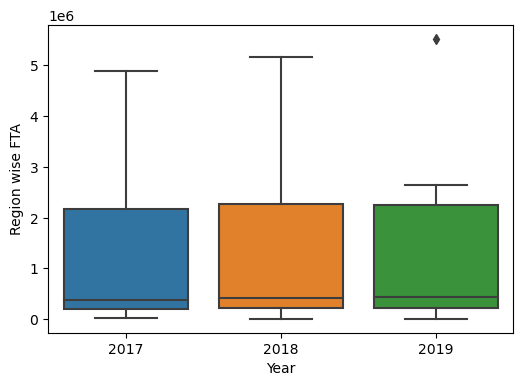

In [10]:
plt.figure(figsize=(6,4))
sns.boxplot(cont_df, x = 'Year', y = 'Region wise FTA')
plt.savefig('fig4');

**<u>Interpretation:</u>** <br>
* All the above three years data (for Region wise FTA); All three are Positively skewed data.
* There is an outlier value for the year 2019. <br>
* Reason for outlier is: in 2019 a significantly high number of tourists arrived in India from Asia. 

## iii. Foreign Exchange Income depending on Tourism:

In [11]:
forex_df1 = pd.read_excel('Stats_Tourism.xlsx', sheet_name=2, index_col='Year')
forex_df1

,Forex Income(in ₹ Crore)
Year,
2009,53754
2010,66172
2011,83036
2012,95607
2013,107563
2014,120367
2015,134844
2016,154146
2017,177874


In [12]:
# Statistical Properties:
forex_df = pd.read_excel('Stats_Tourism.xlsx', sheet_name=2)
forex_df['Forex Income(in ₹ Crore)'].describe()

count        11.000000
mean     127264.090909
std       52503.633140
min       53754.000000
25%       89321.500000
50%      120367.000000
75%      166010.000000
max      211661.000000
Name: Forex Income(in ₹ Crore), dtype: float64

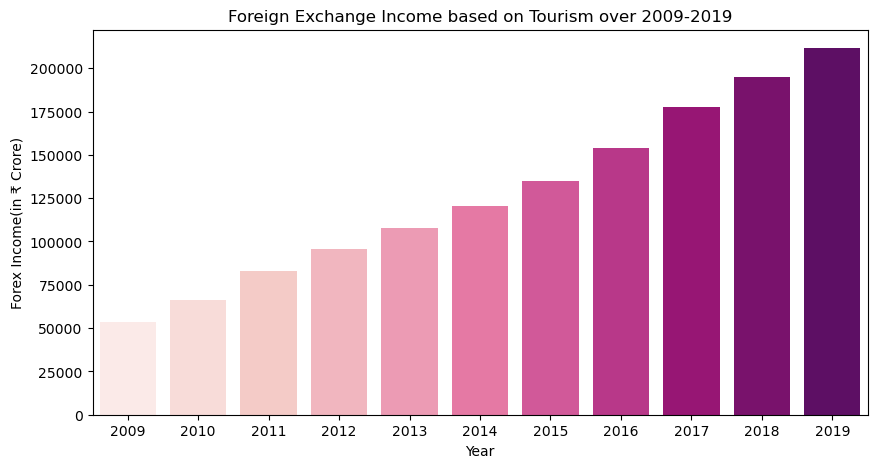

In [13]:
plt.figure(figsize=(10,5))
sns.barplot(data = forex_df, x = 'Year', y = 'Forex Income(in ₹ Crore)', palette='RdPu')
plt.title('Foreign Exchange Income based on Tourism over 2009-2019')
plt.savefig('fig5');

**<u>Interpretation:</u>** <br> 
* Since number of tourist arrived india is gradually increasing over the years,the amount of Foreign exchange Income is also increasing.
* This is a good sign for the economy Of India as its foreign reserve increases which in turn strengthens our economy.

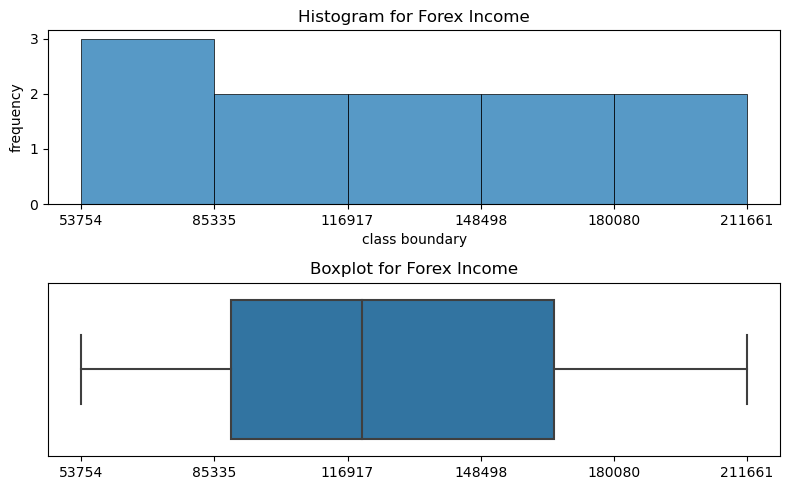

In [14]:
plt.figure(figsize=(8,5))
ax1 = ax2 = 0
forex_xaxis = np.round(np.histogram(a = forex_df["Forex Income(in ₹ Crore)"], bins=5)[1], 2)

ax1 = plt.subplot(2,1,1)
sns.histplot(data=forex_df, x="Forex Income(in ₹ Crore)", ax=ax1)
ax1.set_xticks(forex_xaxis)
ax1.set_xlabel('class boundary')
ax1.set_ylabel('frequency')
ax1.set_title("Histogram for Forex Income")

ax2 = plt.subplot(2,1,2)
sns.boxplot(forex_df, x="Forex Income(in ₹ Crore)", ax=ax2)
ax2.set_title("Boxplot for Forex Income")
ax2.set_xticks(forex_xaxis)
ax2.set(yticks=[])
ax2.set_xlabel('')
plt.tight_layout()
plt.savefig('fig6');

**<u>Interpretation:</u>** <br>  
* For the given years the range of foreign exchange income lies between 53754 crore to 211661 crore 
* Median of forex income for the given years is 120367 crore Rs
* According to Box plot 25% of forex amount is less than 89321 crore
* 50% of forex amount is less than 120367
* 75% of forex amount is less than 166010
* Middle 50% of data is lying in between 89321 and 166010. 
* IQR is (89321-166010) = 76689 crore Rs
* here Q2Q3 is greater than Q1Q2 . So above data is right skewed.

## iv. GDP of India depending on Tourism:

In [15]:
gdp_df1 = pd.read_excel('Stats_Tourism.xlsx', sheet_name=3, index_col='Year')
gdp_df1

,GDP of india(₹ Crore),Contribution of Tourism (₹ Crore),Percentage
Year,,,
2009-10,6457351,237768,3.68
2015-16,13485249,364668,2.69
2018-19,18899668,492371,2.61
2019-20,20074858,541321,2.69


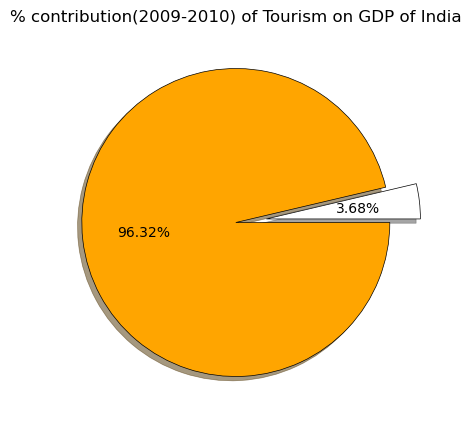

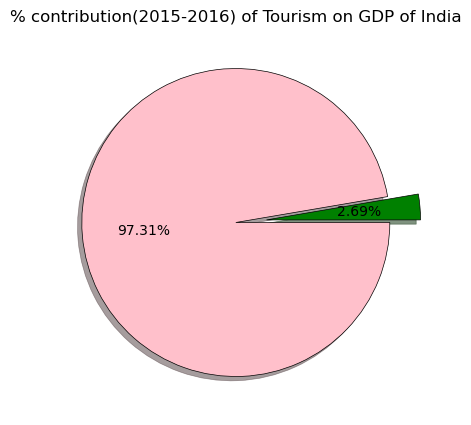

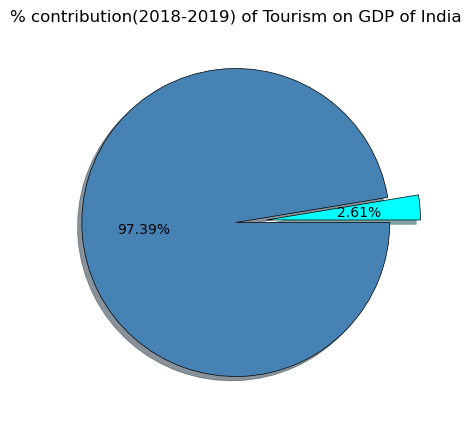

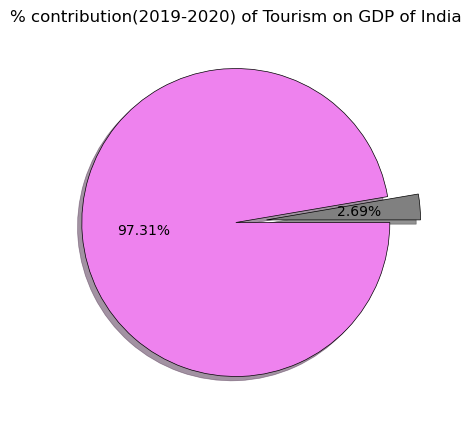

In [16]:
gdp_df = pd.read_excel('Stats_Tourism.xlsx', sheet_name=3)
l1 = np.array([gdp_df['Percentage'][0], 100-gdp_df['Percentage'][0]])
plt.figure(figsize=(8,5))
plt.pie(l1,colors=['white', 'orange'],explode=[0.2,0],shadow=True,wedgeprops={'edgecolor':'black'},
        autopct='%0.2f%%')
plt.title('% contribution(2009-2010) of Tourism on GDP of India');
plt.savefig('fig7')

l2 = np.array([gdp_df['Percentage'][1], 100-gdp_df['Percentage'][1]])
plt.figure(figsize=(8,5))
plt.pie(l2,colors=['green', 'pink'],explode=[0.2,0],shadow=True,wedgeprops={'edgecolor':'black'},
        autopct='%0.2f%%')
plt.title('% contribution(2015-2016) of Tourism on GDP of India');
plt.savefig('fig8')

l3 = np.array([gdp_df['Percentage'][2], 100-gdp_df['Percentage'][2]])
plt.figure(figsize=(8,5))
plt.pie(l3,colors=['cyan', 'steelblue'],explode=[0.2,0],shadow=True,wedgeprops={'edgecolor':'black'},
        autopct='%0.2f%%')
plt.title('% contribution(2018-2019) of Tourism on GDP of India');
plt.savefig('fig9')

l4 = np.array([gdp_df['Percentage'][3], 100-gdp_df['Percentage'][3]])
plt.figure(figsize=(8,5))
plt.pie(l4,colors = ['grey', 'violet'],explode=[0.2,0],shadow=True,wedgeprops={'edgecolor':'black'},
        autopct='%0.2f%%')
plt.title('% contribution(2019-2020) of Tourism on GDP of India');
plt.savefig('fig10')

**<u>Interpretation:</u>** <br>   
* Contribution of Tourism Industry towards India's GDP was 3.68% in the year 2009-10
* But in the subsequent year (2015-16) the percentage contribution decreased and it remained constant for the next years.
* Over the years India's GDP has grown rapidly. But compared to that, tourism industry has not grown that much. Due to that reason, overall % contribution from Tourism has been decreased. 

## v. Employment Generation in India depending on Tourism:

In [17]:
employment_df1 = pd.read_excel('Stats_Tourism.xlsx', sheet_name=4, index_col='Year')
employment_df1

,Total Employment (in million),Contribution of Tourism towards Employment (in million),Percentage Contribution
Year,,,
2009-10,535.50,54.47,10.17
2015-16,583.80,72.26,12.38
2018-19,510.25,75.85,14.87
2019-20,520.62,79.86,15.34


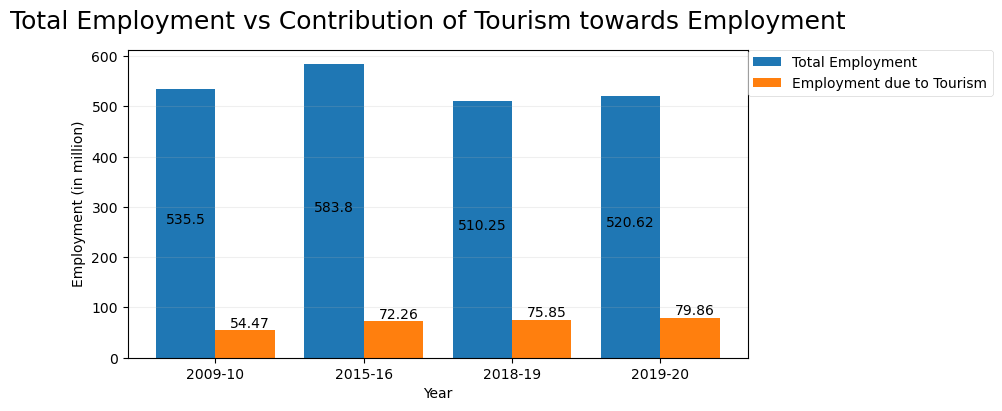

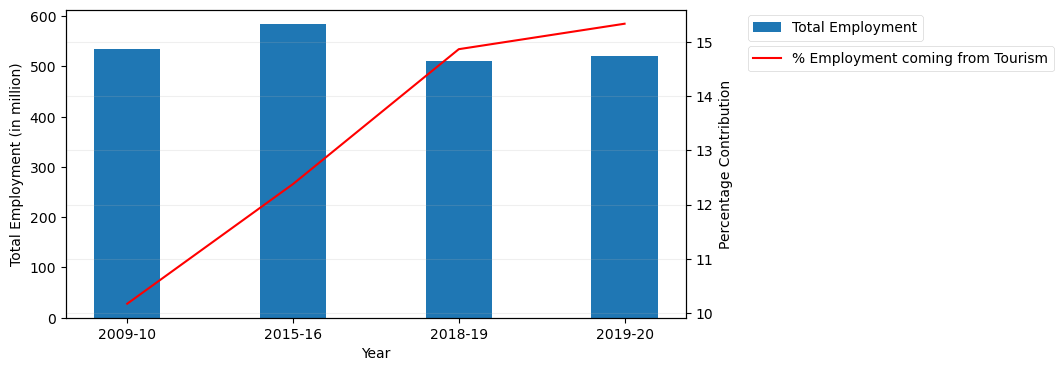

In [18]:
employment_df = pd.read_excel('Stats_Tourism.xlsx', sheet_name=4)


# Figure-1:
df = employment_df.copy()
df['srl'] = [0.8,1.8,2.8,3.8]

plt.figure(figsize=(8,4))
# plt.figure(figsize=(10,6))
plt.suptitle('Total Employment vs Contribution of Tourism towards Employment', fontsize=18)
plt.bar(df['srl']-0.2, df['Total Employment (in million)'], width=0.4, label='Total Employment')
for i in range(len(df['srl'])):
    plt.text(i+0.6, df['Total Employment (in million)'][i]//2, df['Total Employment (in million)'][i],
             ha = 'center')

plt.bar(df['srl']+0.2, df['Contribution of Tourism towards Employment (in million)'], width=0.4, 
        label = 'Employment due to Tourism')
y = df['Contribution of Tourism towards Employment (in million)']
for j in range(len(df['srl'])):
    plt.text(j+0.9, y[j]+5.5, y[j])
    
list1 = [0.8,1.8,2.8,3.8]
list2 = ['2009-10', '2015-16', '2018-19', '2019-20']
plt.xticks(list1, list2)
plt.grid(axis='y', alpha=0.2)
plt.xlabel('Year')
plt.ylabel('Employment (in million)')
plt.legend(loc = (1.0,0.85))
# plt.legend(loc = (0.8,0.9))
plt.savefig('fig11')


# Figure-2:
fig, ax1 = plt.subplots(figsize=(8,4))
ax2 = ax1.twinx()
ax1.bar(df['srl'], df['Total Employment (in million)'], width=0.4, label = 'Total Employment')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Employment (in million)')
ax2.plot(df['srl'], df['Percentage Contribution'], color = 'red', 
         label = '% Employment coming from Tourism')
ax2.set_xlabel('Year')
ax2.set_ylabel('Percentage Contribution')
ax1.legend(loc = (1.1,0.9))
ax2.legend(loc = (1.1,0.8))
list1 = [0.8,1.8,2.8,3.8]
list2 = ['2009-10', '2015-16', '2018-19', '2019-20']
plt.xticks(list1, list2)
plt.grid(axis='y', alpha=0.2);

**<u>Interpretation:</u>** <br>   
* Overall employment in India around 2015-16 increased as comared to 2009-10. <br>
* But after that the total employment generated in India is gradually decreasing over years.
* On the contrary; for Tourism, number of employment generated is gradually increasing. 
* So we can assume over the years the tourism industry is flourishing .

# Bivariate Analysis:

## Bivariate Analysis for "Contribution of Tourism" & "GDP of India" :

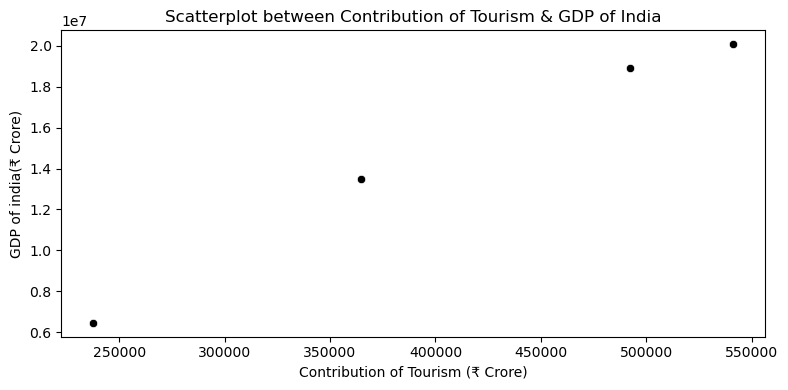

In [19]:
# Scatterplot:
plt.figure(figsize=(8,4))
sns.scatterplot(data=gdp_df, y = 'GDP of india(₹ Crore)', x = 'Contribution of Tourism (₹ Crore)', 
                c='black')
plt.title('Scatterplot between Contribution of Tourism & GDP of India')
plt.tight_layout()
plt.savefig('fig12');

### Pearson's Correlation Coefficent:

In [20]:
a = np.corrcoef(gdp_df['Contribution of Tourism (₹ Crore)'], gdp_df['GDP of india(₹ Crore)'])[0][1]
print('Correlation Co-efficent between these two variables is: ', np.round(a,3))

Correlation Co-efficent between these two variables is:  0.994


**<u>Interpretation:</u>** <br> 
* "GDP of india" and "Contribution of Tourism" is linearly dependent to each other. 

## Bivariate Analysis for "Foreign Tourist Arival" & "Forex income of India":

In [21]:
# Data we have:
df1 = pd.merge(left=forex_df, right=FTA, how='inner', on='Year')
df1

,Year,Forex Income(in ₹ Crore),FTA's In India(Million)
0,2009,53754,5.17
1,2010,66172,5.78
2,2011,83036,6.31
3,2012,95607,6.58
4,2013,107563,6.97
5,2014,120367,7.68
6,2015,134844,8.03
7,2016,154146,8.80
8,2017,177874,10.04
9,2018,194881,10.56


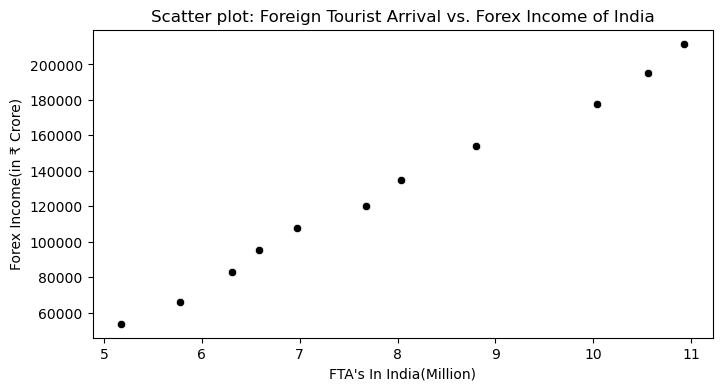

In [22]:
# Scatterplot:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df1, y = 'Forex Income(in ₹ Crore)', x = "FTA's In India(Million)", c='black')
plt.title('Scatter plot: Foreign Tourist Arrival vs. Forex Income of India')
plt.savefig('fig13');

### Pearson's Correlation Coefficent:

In [23]:
a = np.corrcoef(df1["FTA's In India(Million)"], df1['Forex Income(in ₹ Crore)'])[0][1]
print('Correlation Co-efficent between these two variables is: ', np.round(a,3))

Correlation Co-efficent between these two variables is:  0.997


**<u>Interpretation:</u>** <br> 
* "Foreign Tourist Arrival in India" and "Forex Income of India" are highly correlated with each other. 

# Regression Analysis:
(the following graphs have been created by the help of Power BI tool)

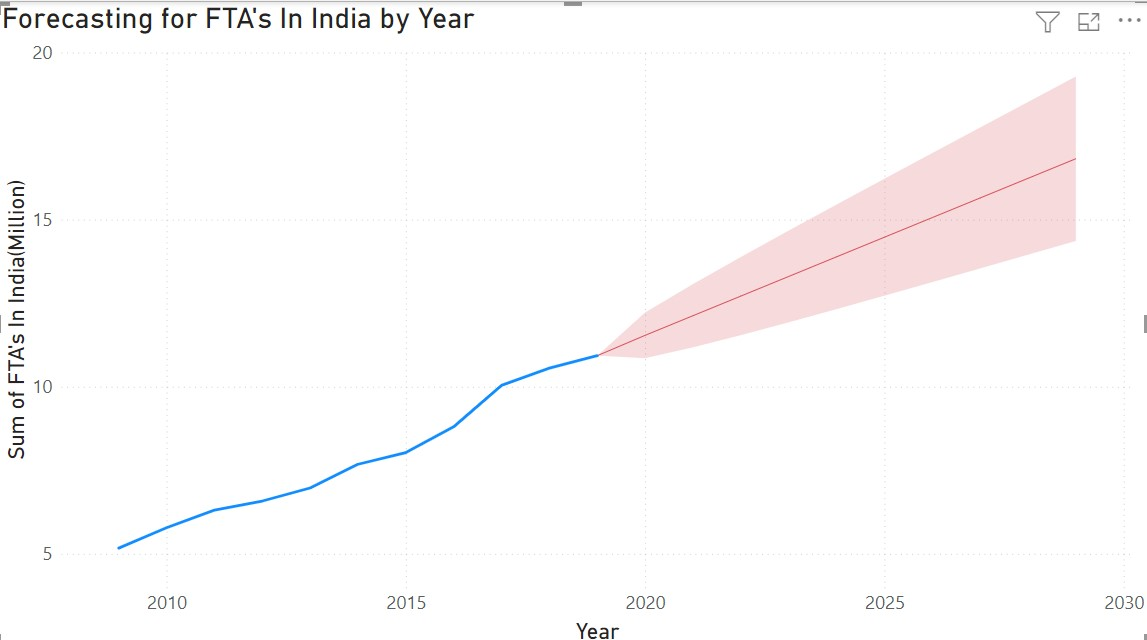

In [24]:
Image(filename="Forecasting_of_FTA.JPG")

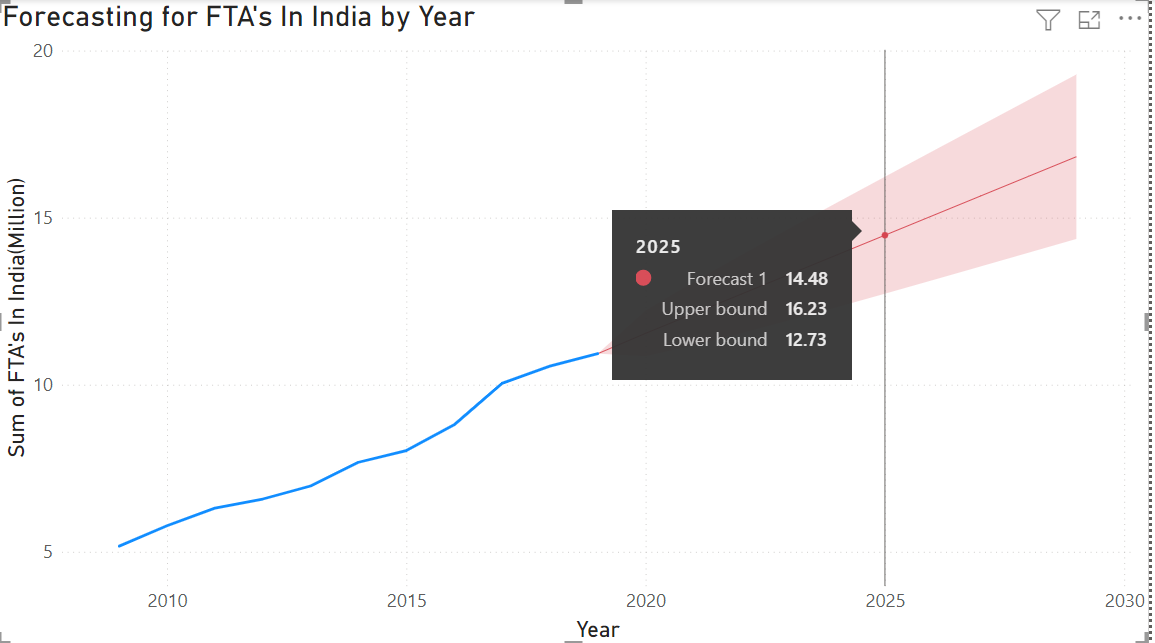

In [25]:
Image(filename="Forecasting of FTA1.png")

**<u>Interpretation:</u>** <br> 
* We have performed above Regression plot at 95% confidence level & with 5 % permissible error.
* We can also forecast that in year 2025, total number of foreign tourist arrival in India will be 14.48 Million.

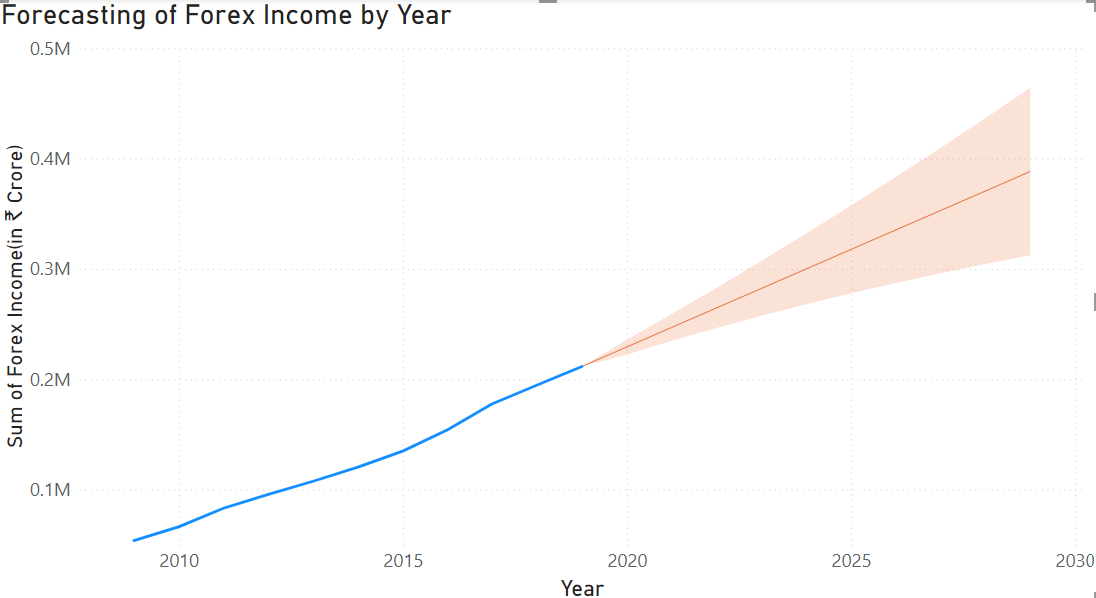

In [26]:
Image(filename="Forecasting of FOREX.png")

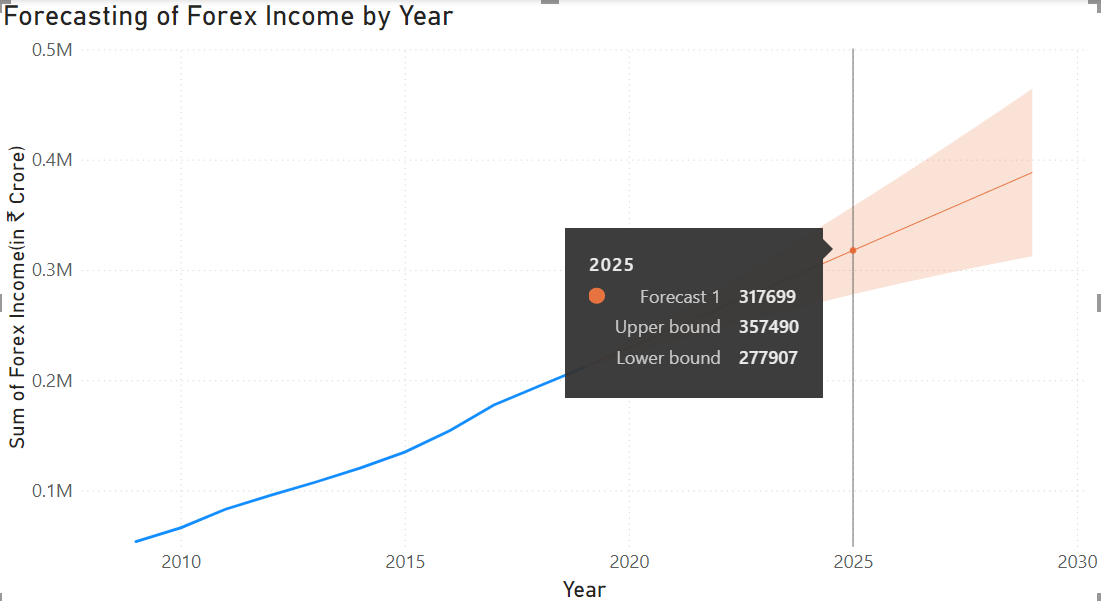

In [27]:
Image(filename="Forecasting of Forex1.png")

**<u>Interpretation:</u>** <br> 
* We have performed above Regression plot at 95% confidence level & with 5 % permissible error.
* Above graph is also forecasting that in year 2025, total Forex income of India will be 317699 crore.

# Conclusion:
From all of the above exploratory data analysis, we can conclude the following facts- <br>
* Foreign Tourist Arrival (FTA) in India will be increasing over the years.
* Since Forex income is highly correlated with FTA, we can conclude that, over the years Forex income of India will be showing a sharp rise pattern.
* For the same reason; %contribution of Tourism towards India's GDP will also be increased.
* As a result, Indian Tourism will generate more and more employment opportunities in near future. 